# Multiple Linear Regression

## Bike Sharing System of BoomBikes

### Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

1. Which variables are significant in predicting the demand for shared bikes.

2. How well those variables describe the bike demands.

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

### Data Dictionary
 The "day.csv" have the following fields:

- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

## Step-1 Reading and Understanding the Data

In [1]:
#importing the required libraries for this assignment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#importing required warnings
import warnings
warnings.filterwarnings('ignore')

#importing the Statistical Libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#inporting the required sklearn libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#importing the math libraries
from math import sqrt

#importing the calendar
import calendar

In [2]:
#let's read the dataset by using pandas
boombikes_data=pd.read_csv('day.csv')
boombikes_data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [3]:
boombikes_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
boombikes_data.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [5]:
boombikes_data.shape

(730, 16)

In [6]:
boombikes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
boombikes_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step:2 - Visualizing the Data
### Visualzing the plots of Numeric Variables
Plot the pairplot using seaborn

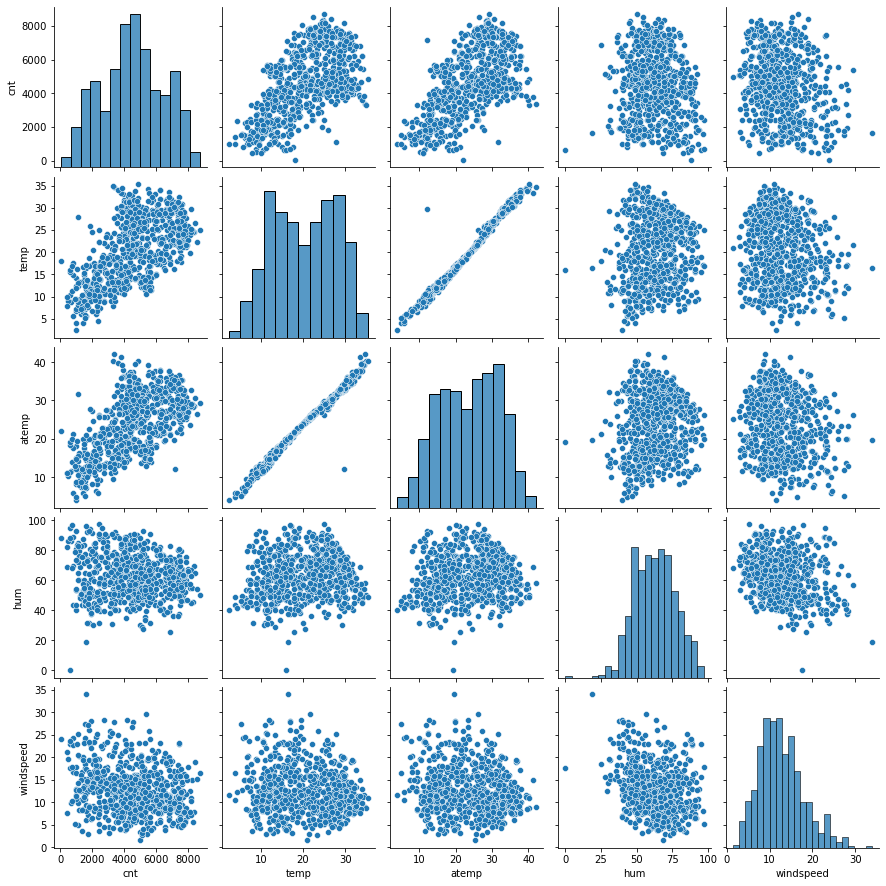

In [8]:
sns.pairplot(data=boombikes_data,vars=['cnt','temp','atemp','hum','windspeed'])
plt.show()

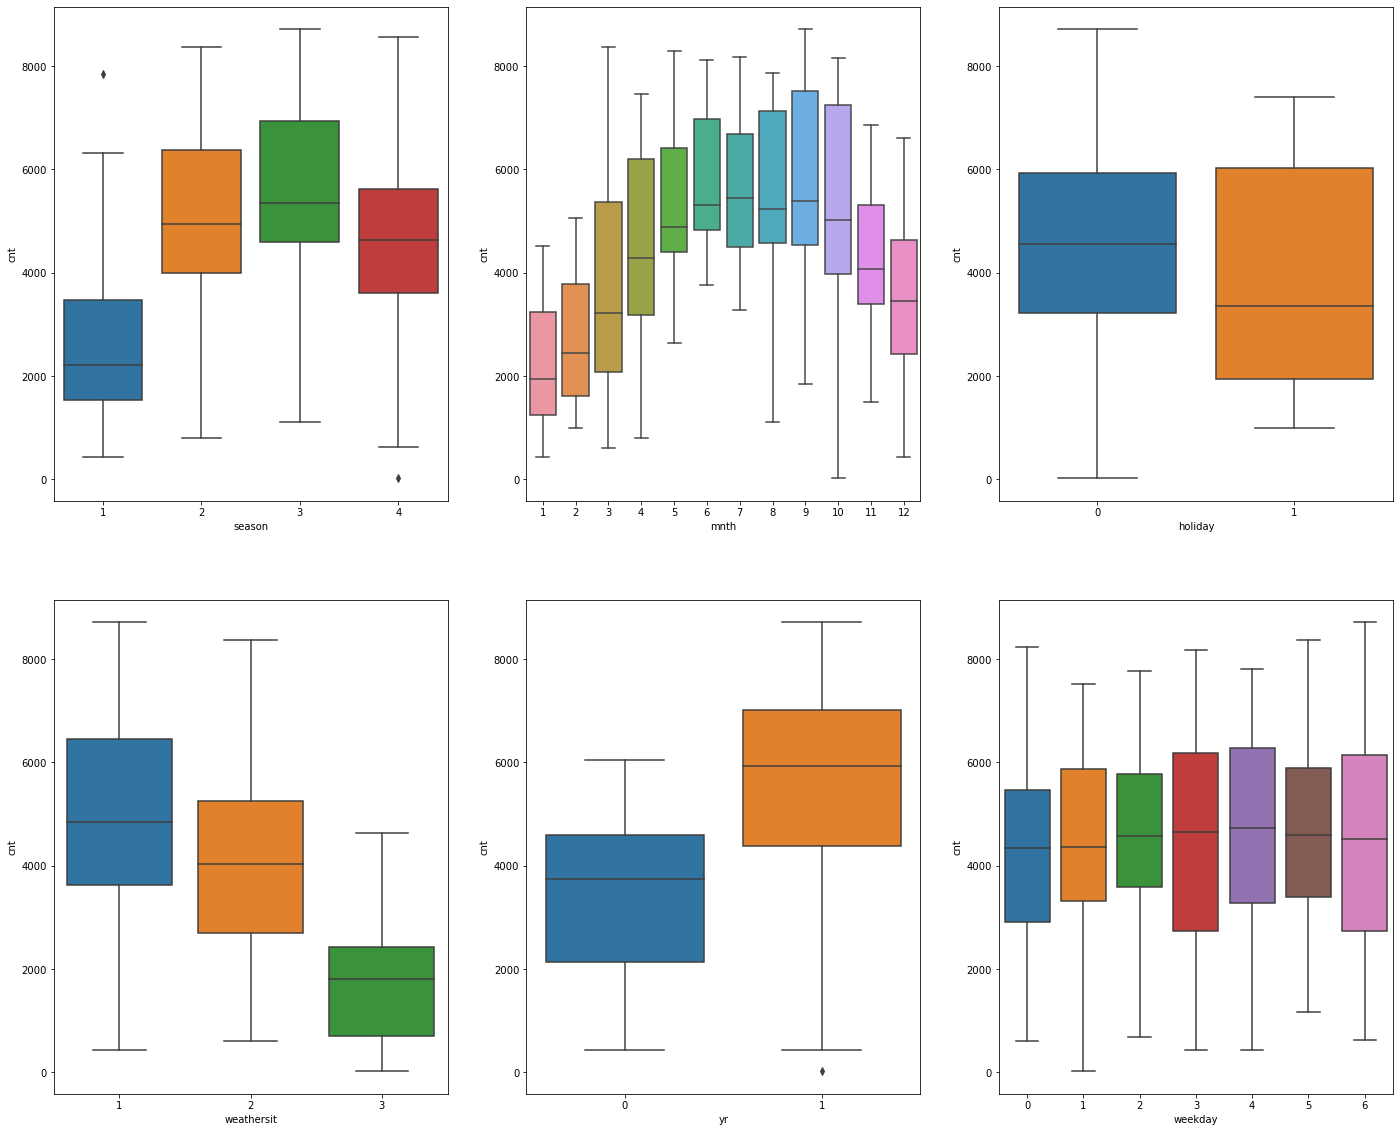

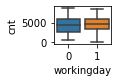

In [9]:
plt.figure(figsize=(24, 20))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = boombikes_data)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = boombikes_data)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = boombikes_data)
plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = boombikes_data)
plt.subplot(2,3,5)
sns.boxplot(x = 'yr', y = 'cnt', data = boombikes_data)
plt.subplot(2,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = boombikes_data)
plt.show()
plt.subplot(5,5,7)
sns.boxplot(x='workingday',y='cnt',data=boombikes_data)
plt.show()

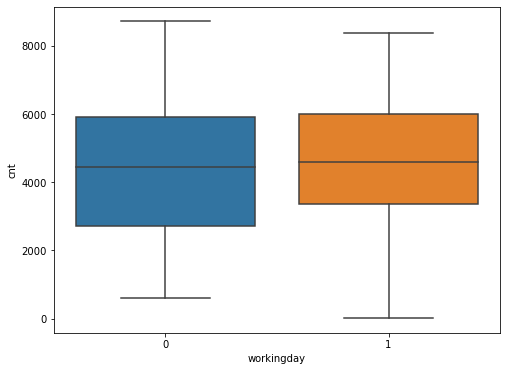

In [10]:
# Since the working day boxplot is too small let's redo the boxplot for workingdays and cnt
plt.figure(figsize = (8, 6))
sns.boxplot(x = 'workingday', y = 'cnt', data = boombikes_data)
plt.show()

- The count of bike sharing is very low in spring
- The number of bike shares increased in the 2019
- The cnt has zero values for weather situation - 'Heavy snow and Rain situations'
- The cnt values increases in summer months
- The cnt values were low during holidays

# Step:3 - Data Preparation

In [11]:
# Let's drop the columns that were not used in the model
boombikes_data.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)
boombikes_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
# Let's convert some numeric variables to categorical variables
boombikes_data['mnth']=boombikes_data['mnth'].apply(lambda x:calendar.month_abbr[x])

In [13]:
# Now map the seasons
boombikes_data.season=boombikes_data.season.map({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})

In [14]:
# Also map the weathersit (weather situation)
boombikes_data.weathersit=boombikes_data.weathersit.map({1:'Clear',2:'Mist & Cloudy', 
                                             3:'Light Snow & Rain',4:'Heavy Snow & Rain'})

In [15]:
# Also map the weekdays
boombikes_data.weekday=boombikes_data.weekday.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",
                                           4:"Thrusday",5:"Friday",6:"Saturday"})

In [16]:
# Let's look at the dataset after mapping all variable changes done above
boombikes_data

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,Spring,1,Dec,0,Thrusday,1,Mist & Cloudy,10.420847,11.33210,65.2917,23.458911,2114
726,Spring,1,Dec,0,Friday,1,Mist & Cloudy,10.386653,12.75230,59.0000,10.416557,3095
727,Spring,1,Dec,0,Saturday,0,Mist & Cloudy,10.386653,12.12000,75.2917,8.333661,1341
728,Spring,1,Dec,0,Sunday,0,Clear,10.489153,11.58500,48.3333,23.500518,1796


In [17]:
boombikes_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Adding of some dummy variables

In [18]:
# creating some dummy variables for month, season, weekday and weathersit
boombikes_dummy_data=boombikes_data[['season','mnth','weathersit','weekday']]

In [19]:
boombikes_dummy_data=pd.get_dummies(boombikes_dummy_data,drop_first=True)

In [20]:
# So lets add these created dummy variables to the original dataset
boombikes_data=pd.concat([boombikes_dummy_data,boombikes_data],axis=1)

In [21]:
boombikes_data

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,0,0,1,0,0,0,0,0,...,Dec,0,Thrusday,1,Mist & Cloudy,10.420847,11.33210,65.2917,23.458911,2114
726,1,0,0,0,1,0,0,0,0,0,...,Dec,0,Friday,1,Mist & Cloudy,10.386653,12.75230,59.0000,10.416557,3095
727,1,0,0,0,1,0,0,0,0,0,...,Dec,0,Saturday,0,Mist & Cloudy,10.386653,12.12000,75.2917,8.333661,1341
728,1,0,0,0,1,0,0,0,0,0,...,Dec,0,Sunday,0,Clear,10.489153,11.58500,48.3333,23.500518,1796


In [22]:
boombikes_data.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [23]:
# Now let's drop the variables for which dummy variables are created
boombikes_data.drop(['season','mnth','weekday','weathersit'],axis=1,inplace=True)
boombikes_data

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weekday_Tuesday,weekday_Wednesday,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,10.420847,11.33210,65.2917,23.458911,2114
726,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,10.386653,12.75230,59.0000,10.416557,3095
727,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,10.386653,12.12000,75.2917,8.333661,1341
728,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,10.489153,11.58500,48.3333,23.500518,1796


In [24]:
boombikes_data.shape

(730, 30)

## Step:4 - Splitting the  Data into Training and Testing Datasets

In [25]:
# The first step is to split into trai and test dataset
train,test=train_test_split(boombikes_data,train_size=0.7,test_size=0.3,random_state=100)

## Step:5 - Rescaling the Features

In [26]:
scalar=MinMaxScaler()

In [27]:
num_vars=['cnt','hum','windspeed','temp','atemp']
train[num_vars]=scalar.fit_transform(train[num_vars])

In [28]:
train

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weekday_Tuesday,weekday_Wednesday,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
653,0,0,1,0,0,0,0,0,0,0,...,1,0,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243
576,0,0,0,0,0,0,0,1,0,0,...,1,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0.824514,0.762183,0.605840,0.355596,0.764151
578,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0.863973,0.824359,0.679690,0.187140,0.832835
53,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0.202618,0.218747,0.435939,0.111379,0.218017
350,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0.248216,0.223544,0.577930,0.431816,0.312586


In [29]:
train.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weekday_Tuesday,weekday_Wednesday,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
653,0,0,1,0,0,0,0,0,0,0,...,1,0,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243
576,0,0,0,0,0,0,0,1,0,0,...,1,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973


In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   season_Spring                 510 non-null    uint8  
 1   season_Summer                 510 non-null    uint8  
 2   season_Winter                 510 non-null    uint8  
 3   mnth_Aug                      510 non-null    uint8  
 4   mnth_Dec                      510 non-null    uint8  
 5   mnth_Feb                      510 non-null    uint8  
 6   mnth_Jan                      510 non-null    uint8  
 7   mnth_Jul                      510 non-null    uint8  
 8   mnth_Jun                      510 non-null    uint8  
 9   mnth_Mar                      510 non-null    uint8  
 10  mnth_May                      510 non-null    uint8  
 11  mnth_Nov                      510 non-null    uint8  
 12  mnth_Oct                      510 non-null    uint8  
 13  mnth

In [31]:
train.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weekday_Tuesday,weekday_Wednesday,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,...,0.131373,0.158824,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620
std,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,...,0.338139,0.365870,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


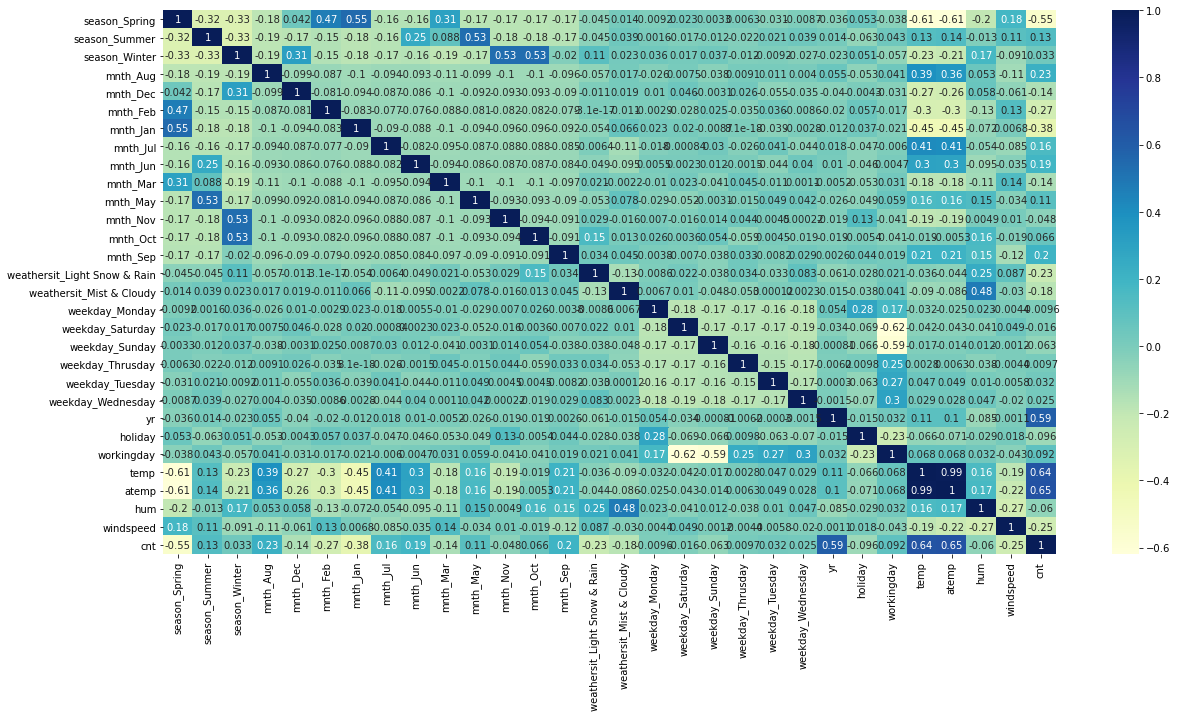

In [32]:
# Checking the correlations of coefficients which are highly correlated
plt.figure(figsize=(20,10))
sns.heatmap(train.corr(),annot=True,cmap='YlGnBu')
plt.show()

## Dividing into X and y datasets for building a model

Building a model using all columns

In [33]:
y_train=train.pop('cnt')
X_train=train

## Step:6 - Building a Linear Model

Fit a regression line in the training dataset using statsmodels. In statsmodels, you need to add and fit a constant using sm.add_constant(X) because if we don't perform this step, statsmodels fits a regression line passing through the origin which is basically default in python.

In [34]:
lm=LinearRegression()
lm.fit(X_train,y_train)

#Running the RFE
rfe=RFE(lm,13)
rfe=rfe.fit(X_train,y_train)

In [35]:
# Columns that were selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 9),
 ('mnth_Dec', False, 5),
 ('mnth_Feb', False, 6),
 ('mnth_Jan', False, 3),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 16),
 ('mnth_Mar', False, 17),
 ('mnth_May', False, 8),
 ('mnth_Nov', False, 4),
 ('mnth_Oct', False, 13),
 ('mnth_Sep', True, 1),
 ('weathersit_Light Snow & Rain', True, 1),
 ('weathersit_Mist & Cloudy', True, 1),
 ('weekday_Monday', False, 11),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', False, 10),
 ('weekday_Thrusday', False, 14),
 ('weekday_Tuesday', False, 12),
 ('weekday_Wednesday', False, 15),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1)]

## Starting with all the selected columns by RFE

# Model:1

In [36]:
# Print the columns that were selected by RFE
# We will start by these columns for manula elimination
col=X_train.columns[rfe.support_]
col

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jul',
       'mnth_Sep', 'weathersit_Light Snow & Rain', 'weathersit_Mist & Cloudy',
       'weekday_Saturday', 'yr', 'holiday', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [37]:
X_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'weekday_Monday', 'weekday_Sunday',
       'weekday_Thrusday', 'weekday_Tuesday', 'weekday_Wednesday',
       'workingday', 'atemp'],
      dtype='object')

In [38]:
# Creating X_test Dataframe with variables selected by RFE
X_train_rfe=X_train[col]

In [39]:
# Adding constant variable
X_train_rfe=sm.add_constant(X_train_rfe)

In [40]:
# Creating the first fitted model
lm=sm.OLS(y_train,X_train_rfe).fit()

In [41]:
# CHecking the parameters that we got finally
lm.params

const                           0.279640
season_Spring                  -0.056290
season_Summer                   0.052092
season_Winter                   0.098387
mnth_Jul                       -0.057853
mnth_Sep                        0.082751
weathersit_Light Snow & Rain   -0.239456
weathersit_Mist & Cloudy       -0.054750
weekday_Saturday                0.017490
yr                              0.229791
holiday                        -0.094469
temp                            0.530609
hum                            -0.168105
windspeed                      -0.183143
dtype: float64

In [42]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.0
Date:                Mon, 06 Dec 2021   Prob (F-statistic):          7.51e-190
Time:                        11:56:20   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -993.5
Df Residuals:                     496   BIC:                            -934.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2796      0.035      8.096      0.000       0.212       0.348
season_Spring                   -0.0563      0.021     -2.701      0.007      -0.097      -0.015
season_Summer                    0.0521      0.015      3.472      0.001       0.023       0.082
season_Winter                    0.0984      0.017      5.706      0.000       0.065       0.132
mnth_Jul                        -0.0579      0.018     -3.162      0.002      -0.094      -0.022
mnth_Sep                         0.0828      0.017      4.952      0.000       0.050       0.116
weathersit_Light Snow & Rain    -0.2395      0.026     -9.090      0.000      -0.291      -0.188
weathersit_Mist & Cloudy        -0.0547      0.011     -5.211      0.000      -0.075      -0.034
weekday_Saturday                 0.0175      0.011      1.575      0.116      -0.004       0.039
yr                               0.2298      0.008     28.298      0.000       0.214       0.246
holiday                         -0.0945      0.026     -3.690      0.000      -0.145      -0.044
temp                             0.5306      0.034     15.779      0.000       0.465       0.597
hum                             -0.1681      0.038     -4.450      0.000      -0.242      -0.094
windspeed                       -0.1831      0.026     -7.120      0.000      -0.234      -0.133
==============================================================================
Omnibus:                       63.307   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.410
Skew:                          -0.685   Prob(JB):                     1.45e-30
Kurtosis:                       5.143   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Lets drop weekday_Saturday column since it has the highest p-value

In [43]:
X_train_new=X_train_rfe.drop(['weekday_Saturday'],axis=1)

## Rebuilding the model after dropping the weekfday_Saturday column

# Model:2

In [44]:
# Again adding the constant variable to the model
X_train_lm=sm.add_constant(X_train_new)

In [45]:
# Running the Rebuild Model
lm=sm.OLS(y_train,X_train_lm).fit()

In [46]:
lm.params

const                           0.284133
season_Spring                  -0.056249
season_Summer                   0.051942
season_Winter                   0.098745
mnth_Jul                       -0.057536
mnth_Sep                        0.083036
weathersit_Light Snow & Rain   -0.238245
weathersit_Mist & Cloudy       -0.054175
yr                              0.229346
holiday                        -0.097404
temp                            0.530017
hum                            -0.171023
windspeed                      -0.181924
dtype: float64

In [47]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Mon, 06 Dec 2021   Prob (F-statistic):          1.69e-190
Time:                        11:56:20   Log-Likelihood:                 509.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2841      0.034      8.242      0.000       0.216       0.352
season_Spring                   -0.0562      0.021     -2.695      0.007      -0.097      -0.015
season_Summer                    0.0519      0.015      3.457      0.001       0.022       0.081
season_Winter                    0.0987      0.017      5.719      0.000       0.065       0.133
mnth_Jul                        -0.0575      0.018     -3.140      0.002      -0.094      -0.022
mnth_Sep                         0.0830      0.017      4.962      0.000       0.050       0.116
weathersit_Light Snow & Rain    -0.2382      0.026     -9.034      0.000      -0.290      -0.186
weathersit_Mist & Cloudy        -0.0542      0.011     -5.151      0.000      -0.075      -0.034
yr                               0.2293      0.008     28.219      0.000       0.213       0.245
holiday                         -0.0974      0.026     -3.809      0.000      -0.148      -0.047
temp                             0.5300      0.034     15.739      0.000       0.464       0.596
hum                             -0.1710      0.038     -4.526      0.000      -0.245      -0.097
windspeed                       -0.1819      0.026     -7.066      0.000      -0.233      -0.131
==============================================================================
Omnibus:                       57.560   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.574
Skew:                          -0.610   Prob(JB):                     2.69e-29
Kurtosis:                       5.169   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Checking the VIFs for Multicollinearity

In [48]:
# Calcuationg the VIFs for our new model
vif=pd.DataFrame()
X=X_train_new
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,74.38
1,season_Spring,5.02
10,temp,3.61
3,season_Winter,3.49
2,season_Summer,2.61
11,hum,1.90
7,weathersit_Mist & Cloudy,1.56
4,mnth_Jul,1.48
5,mnth_Sep,1.30
6,weathersit_Light Snow & Rain,1.24


## We actually need only the VIF of 5, so for that we need to drop some variables

In [49]:
# In this case we need to drop the first high VIF value which is 'const'
X_train_new=X_train_new.drop(['const'],axis=1)

In [50]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,hum,28.06
9,temp,16.02
11,windspeed,4.65
0,season_Spring,4.01
2,season_Winter,3.35
1,season_Summer,2.78
6,weathersit_Mist & Cloudy,2.28
7,yr,2.08
3,mnth_Jul,1.58
4,mnth_Sep,1.38


## Model:3 The Final Model

In [51]:
# Dropping off the hum feature since it has the highest VIF value
X_train_new=X_train_new.drop(['hum'],axis=1)

In [52]:
# Adding the constant variable
X_train_lm=sm.add_constant(X_train_new)

# Creating a first fitted model
lm=sm.OLS(y_train,X_train_lm).fit()

In [53]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Mon, 06 Dec 2021   Prob (F-statistic):          2.40e-187
Time:                        11:56:20   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.1996      0.030      6.758      0.000       0.142       0.258
season_Spring                   -0.0669      0.021     -3.167      0.002      -0.108      -0.025
season_Summer                    0.0453      0.015      2.971      0.003       0.015       0.075
season_Winter                    0.0831      0.017      4.818      0.000       0.049       0.117
mnth_Jul                        -0.0524      0.019     -2.811      0.005      -0.089      -0.016
mnth_Sep                         0.0767      0.017      4.511      0.000       0.043       0.110
weathersit_Light Snow & Rain    -0.2852      0.025    -11.536      0.000      -0.334      -0.237
weathersit_Mist & Cloudy        -0.0816      0.009     -9.301      0.000      -0.099      -0.064
yr                               0.2335      0.008     28.361      0.000       0.217       0.250
holiday                         -0.0980      0.026     -3.761      0.000      -0.149      -0.047
temp                             0.4915      0.033     14.798      0.000       0.426       0.557
windspeed                       -0.1480      0.025     -5.893      0.000      -0.197      -0.099
==============================================================================
Omnibus:                       59.298   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.189
Skew:                          -0.628   Prob(JB):                     4.41e-30
Kurtosis:                       5.187   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
# Calculating the VIFs for our final model which is our new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,5.09
10,windspeed,4.60
1,season_Summer,2.21
0,season_Spring,2.08
7,yr,2.07
2,season_Winter,1.79
3,mnth_Jul,1.58
6,weathersit_Mist & Cloudy,1.55
4,mnth_Sep,1.34
5,weathersit_Light Snow & Rain,1.08


## Step:7 - Residual Analysis of the train data

Now to check if the error terms are also normally distributed which is infact, one of the major assumptions of linear regression. To identify that we need to plot histograms

In [55]:
y_train_cnt=lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

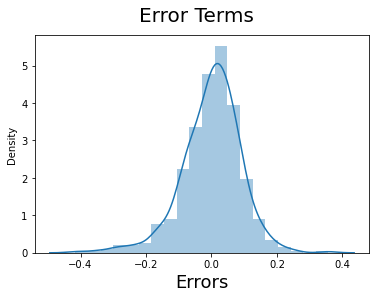

In [56]:
# Plotting the histogram of error terms
fig=plt.figure()
sns.distplot((y_train-y_train_cnt),bins=20)

# Plot heading
fig.suptitle('Error Terms',fontsize=20)

#X-Label
plt.xlabel('Errors',fontsize=18)

## Step:8 - Making Predictions for fial model

Now that we have fitted the model and checked the normality of error terms,now we go ahead and make predictions using the 3rd model.

#### Applying the scaling on the test sets

In [57]:
num_vars=['cnt','hum','windspeed','temp','atemp']
test[num_vars]=scalar.transform(test[num_vars])

In [58]:
test.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weekday_Tuesday,weekday_Wednesday,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,...,0.164384,0.100457,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592
std,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,...,0.371472,0.301297,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


## Dividing into X_test and y_test

In [59]:
y_test=test.pop('cnt')
X_test=test

In [60]:
# Adding the constant variable for testing dataframe
X_test=sm.add_constant(X_test)

In [61]:
# Predicting using the values from the final model
test_col=X_train_lm.columns
X_test=X_test[test_col[1:]]

# Now adding the constant variable to the dataframe
X_test=sm.add_constant(X_test)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   const                         219 non-null    float64
 1   season_Spring                 219 non-null    uint8  
 2   season_Summer                 219 non-null    uint8  
 3   season_Winter                 219 non-null    uint8  
 4   mnth_Jul                      219 non-null    uint8  
 5   mnth_Sep                      219 non-null    uint8  
 6   weathersit_Light Snow & Rain  219 non-null    uint8  
 7   weathersit_Mist & Cloudy      219 non-null    uint8  
 8   yr                            219 non-null    int64  
 9   holiday                       219 non-null    int64  
 10  temp                          219 non-null    float64
 11  windspeed                     219 non-null    float64
dtypes: float64(3), int64(2), uint8(7)
memory usage: 11.8 KB


In [62]:
# Making Predictions using 4th model
y_pred=lm.predict(X_test)

In [63]:
# Checking and finding the r2_score using sklearn.metrics
r2_score(y_test,y_pred)

0.8049418440982381

In [64]:
# Calculating the Mean Square Error
mean_se=mean_squared_error(y_test,y_pred)
mean_se

0.009264444750858145

# Step:9 - Model Evaluation

Plotting the values of actual and predictions

Text(0, 0.5, 'y_pred')

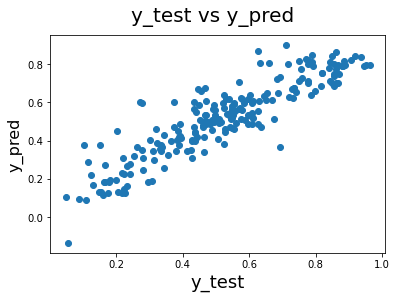

In [65]:
# Plotting the y_test and y_pred for understanding the spread
fig=plt.figure()
plt.scatter(y_test,y_pred)

#Plot Heading
fig.suptitle('y_test vs y_pred',fontsize=20)
# X-Label
plt.xlabel('y_test',fontsize=18)
plt.ylabel('y_pred',fontsize=16)

In [66]:
param = pd.DataFrame(lm.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,12))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

,Variables,Coefficient value
index,,
10,temp,0.491508
8,yr,0.233482
0,const,0.199648
3,season_Winter,0.083084
5,mnth_Sep,0.076686
2,season_Summer,0.045280
4,mnth_Jul,-0.052418
1,season_Spring,-0.066942
7,weathersit_Mist & Cloudy,-0.081558


Here it is clear that the equation for best fittef line is:

cnt = 0.199648 + 0.491508 X temp + 0.233482 X yr + 0.083084 X seasonWinter - 0.066942 X season Spring + 0.083084 X season_Winter -0.052418 X mnth_Jul + 0.076686 X mnth_Sep -0.285155 X weathersit_Light Snow & Rain -0.081558 X weathersit_Mist & Cloudy -0.098013 X holiday -0.147977X windspeed

All the positive coefficients like temp,season_Summer indicate that an increase in these values will lead to an increase in the value of cnt. All the negative coefficients indicate that an increase in these values will lead to an decrease in the value of cnt.

- 1. Temp is the most significant with the largest coefficient.
- 2. Followed by weathersit_Light Snow & Rain.
- 3. Bike rentals is more for the month of september
- 4. The rentals reduce during holidays

### From this we can understand that the factors that affecting the bike rentals are majorly temperature, month and seasons.